I) Réduction de dimensions

    1) Isomap
        - Seléction de features
  
    
II) KMeans clustering
    
    1) Definir le nombre optimal de clusters
        - Calcule de scores de silhoutte et visualization
        - Analyse silhouette de clusters
       
     2) Clutering avec KMeans
     
III) Analyse métier

    1) Préparation des données pour le diagramme en radar
    2) Kiviat chart (diagramme en radar)

IV) Stabilité temporelle - proposer une mise à jour du modèle 

    1) Préparer le jeu de données 
    2) 


In [2]:
# Librairies importées
import pandas as pd
import numpy as np
#import seaborn as sns

# VIsualisations
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Dimentionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap


#Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
#from sklearn import preprocessing


In [3]:
# Importer les données
encoded_data = pd.read_csv('encoded.csv')
processed_data=pd.read_csv('./processed_data.csv.')
X_train = pd.read_csv('./X_train.csv')

X_test = pd.read_csv('./X_test.csv')

In [4]:
processed_data.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
0,0.607412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
1,0.482412,0.448469,0.887652,0.252547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
2,0.357412,0.448469,0.887652,0.252547,0.425257,0.40538,0.615639,0.472895,0.454508,0.931327,0.153031,0.425103,0.851154,0.331878,0.391865
3,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.153031,0.925103,0.351154,0.331878,0.391865
4,0.607412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.925103,0.351154,0.331878,0.391865


In [5]:
X_train.shape, X_test.shape

((88568, 16), (37959, 16))

In [6]:
X_train.head()

,Unnamed: 0,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
0,60422,0.607412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.331878,0.891865
1,36059,0.607412,0.448469,0.387652,0.752547,0.425257,0.90538,0.115639,0.472895,0.954508,0.431327,0.153031,0.425103,0.351154,0.331878,0.891865
2,89586,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865
3,78471,0.107412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
4,55127,0.607412,0.448469,0.387652,0.252547,0.925257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865


In [7]:
# L'indexation des lignes avant la separation train et test est restée comme colonne
# nous allons la supprimer pour X_train et X_test
X_train = X_train.drop( columns='Unnamed: 0')
X_test = X_test.drop( columns='Unnamed: 0')

In [8]:
X_train.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
0,0.607412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.331878,0.891865
1,0.607412,0.448469,0.387652,0.752547,0.425257,0.90538,0.115639,0.472895,0.954508,0.431327,0.153031,0.425103,0.351154,0.331878,0.891865
2,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865
3,0.107412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
4,0.607412,0.448469,0.387652,0.252547,0.925257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865


I) Réduction de dimentions

    1) Isomap
        - Seléction de features
  
Réduction de dimentions à l'aide d'ISOMAP (Isometric Mapping)
C'est un algorithm de ML non supervisé de réduction de dimention non  linéaire.

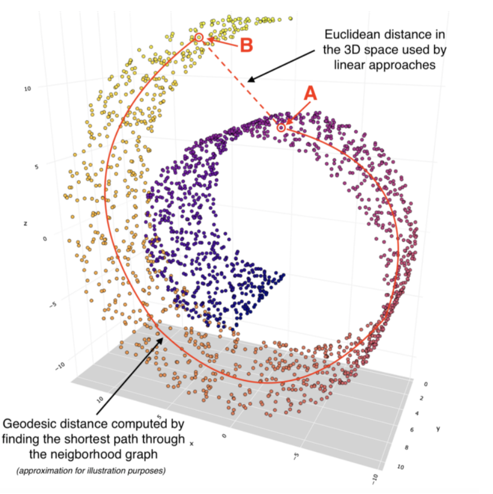

comment marche ISOMAP ?
1) cette technique utilise l'approche de KNN pour touver le voisin le plus proche pour chaque point 
2) Ensuite Construit le graphique en focntion des points voisins , c'est à dire les points les plus proches sont connéctés et ceux éloignés ne sont pas connéstés
3) Calcule la plus courte distance entre les nodes (les pairs de points similaires)
4) Utilise la méthode MDS Multidimentional scaling pour calculer les axes qui permettent de representer les données avec moins de dimentions.
   Ces axes permettent de placer les points de données de telle façon à ce que les distances entre les points sont préservées au mieux.


In [9]:
# Réduction dimentions 
isomap_embed = Isomap(n_components=15, n_jobs = 4, n_neighbors = 5)
isomap_embed.fit(processed_data.iloc[0:5000,:])
X_isomap_embed = isomap_embed.transform(X_train)

In [10]:
X_isomap_embed.var(axis=0)

array([2.80855198, 0.95580307, 0.83576485, 0.62400855, 0.45300217,
       0.26718118, 0.24326275, 0.22169496, 0.12055488, 0.09152269,
       0.07843855, 0.07774087, 0.06829667, 0.0637412 , 0.04330212])

In [11]:
# Créeer un dataframe pour les dimentions réduites
df_isomap_embeddings = pd.DataFrame(X_isomap_embed)

In [12]:
df_isomap_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.110075,1.825314,-0.599003,-0.580675,0.568708,0.080185,-0.149136,0.354686,-0.184649,-0.213031,1.339847,-0.172814,-1.124985,0.235421,-0.375204
1,2.523753,-0.025723,-0.349188,-0.022620,-0.688605,0.540245,-0.576610,-0.652719,-0.232454,-0.059137,0.362006,-0.495480,-0.419635,-0.317946,-0.251410
2,0.047066,-0.059013,0.120892,-0.006497,0.058216,-0.021664,0.033267,0.021492,0.007397,0.007183,-0.002879,0.016154,0.013664,0.008139,0.002257
3,0.273735,1.420067,-0.345068,-0.316702,-0.908924,0.219021,-0.692454,0.549917,0.174236,-0.793285,1.008330,-0.166223,-0.805775,-0.212516,-0.189310
4,0.047065,-0.059009,0.120885,-0.006497,0.058209,-0.021660,0.033260,0.021486,0.007395,0.007179,-0.002878,0.016144,0.013654,0.008133,0.002254


In [15]:
# Transformer de Sklearn pour faire la seléction de variables

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.09)
selector.fit_transform(X_isomap_embed)
selector.get_support() # Returns a boolean for the values that respect the condition of  variance threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False])

In [16]:
reduced_data = df_isomap_embeddings.iloc[: , :-5]

In [17]:
reduced_data.to_csv('reduced_data.csv', index = False)

In [18]:
reduced_data.shape

(88568, 10)

In [19]:
reduced_data.head()

,0,1,2,3,4,5,6,7,8,9
0,2.110075,1.825314,-0.599003,-0.580675,0.568708,0.080185,-0.149136,0.354686,-0.184649,-0.213031
1,2.523753,-0.025723,-0.349188,-0.022620,-0.688605,0.540245,-0.576610,-0.652719,-0.232454,-0.059137
2,0.047066,-0.059013,0.120892,-0.006497,0.058216,-0.021664,0.033267,0.021492,0.007397,0.007183
3,0.273735,1.420067,-0.345068,-0.316702,-0.908924,0.219021,-0.692454,0.549917,0.174236,-0.793285
4,0.047065,-0.059009,0.120885,-0.006497,0.058209,-0.021660,0.033260,0.021486,0.007395,0.007179


II) KMeans clustering
    
    1) Definir le nombre de clusters optimal
        - Calcule de scores de silhoutte et visualization
        - Analyse silhouette de clusters
    
 

Le score de silhouette varie de -1 à 1.

        - Un score de 1 signifie que les points de données forment un cluster compacte et ils sont éloignés des autres clusters.
        
        - Avec un score qui se rapproche de -1 les clusters sont malformés et les points ne sont pas disposés de manière compacte.
        
        - Un score de 0 signifie des clusters qui se chevauchent.



In [38]:
silhouette_isomap =  {}
for k in range(2, 9):
    # seed of 42 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=300,
                    init='k-means++', 
                     n_init=9,  
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto').fit(X_isomap_embed)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    
    silhouette_isomap[k] = silhouette_score(X_isomap_embed,clusters)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs

In [40]:
silhouette_isomap

{2: 0.6223224568359488,
 3: 0.6317066476472573,
 4: 0.6557907417880036,
 5: 0.6753076049861513,
 6: 0.6959565671365979,
 7: 0.7276251405877758,
 8: 0.744492888031789}

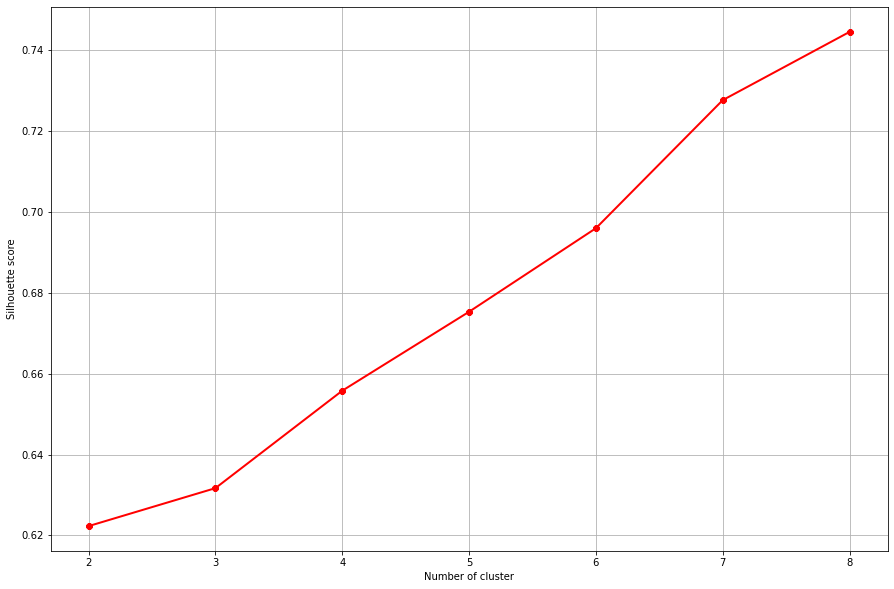

In [41]:
#Représentation graphique de score de silouhette
#en fonction du nombre de clusters

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(list(silhouette_isomap.keys()), list(silhouette_isomap.values()),linewidth=2, color="red", marker ="8")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [236]:
elbow_inertia = {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=300,random_state=42).fit(X_isomap_embed)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    elbow_inertia[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  

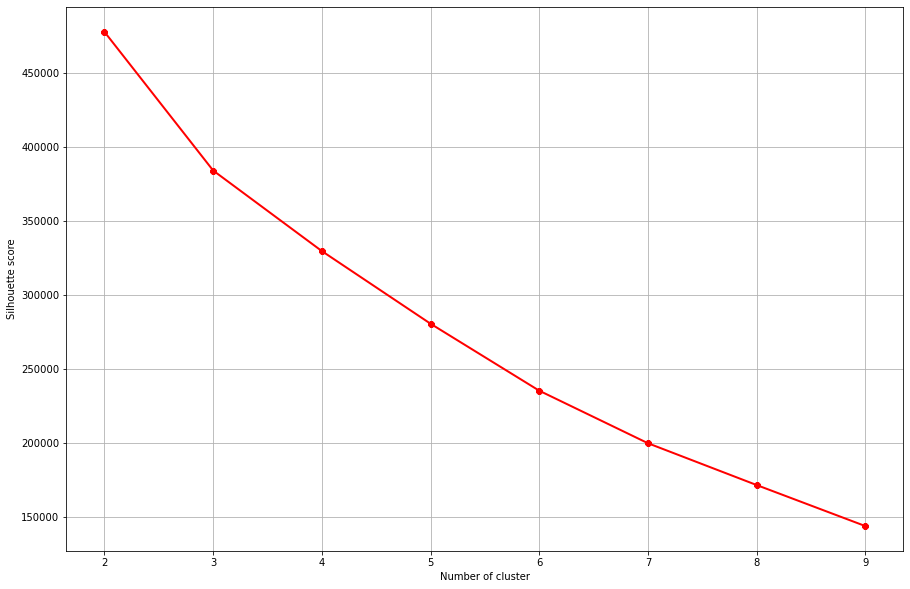

In [237]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(list(elbow_inertia.keys()), list(elbow_inertia.values()),linewidth=2, color="red", marker ="8")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

II) KMeans clustering

    2) Clutering avec KMeans
      

In [13]:
# Sélectionner les hyperparamètres du modèle de Clustering
KM_Model = KMeans(n_clusters=6, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001, 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True,  
                     algorithm='auto')

In [20]:
# Entrainer le model
KM_Model.fit(reduced_data)

KMeans(n_clusters=6, random_state=1)

In [21]:
# Définir les lables des clusters 
labels_isomap_reduced_data = KM_Model.labels_

    - Analyse silhouette de clusters

For n_clusters = 6 The average silhouette_score is : 0.7090281118269014
For n_clusters = 7 The average silhouette_score is : 0.7371934742590261
For n_clusters = 8 The average silhouette_score is : 0.7596914114829516


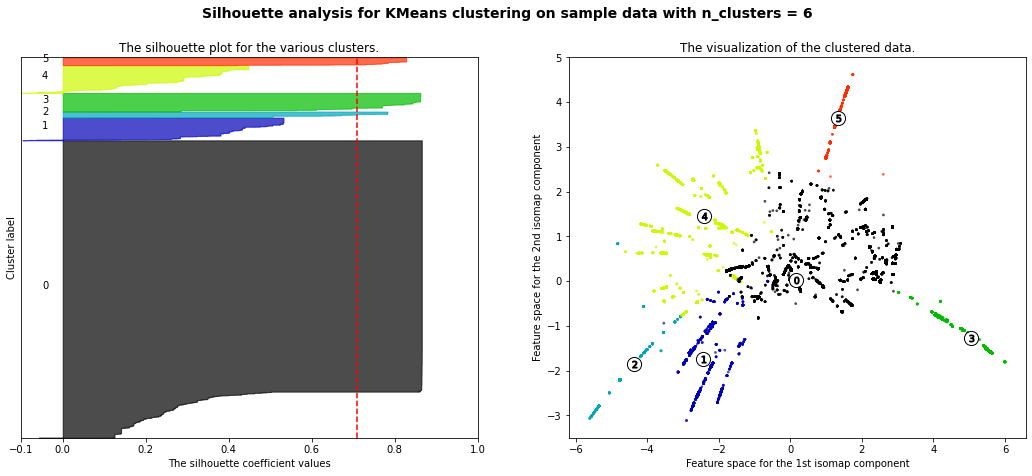

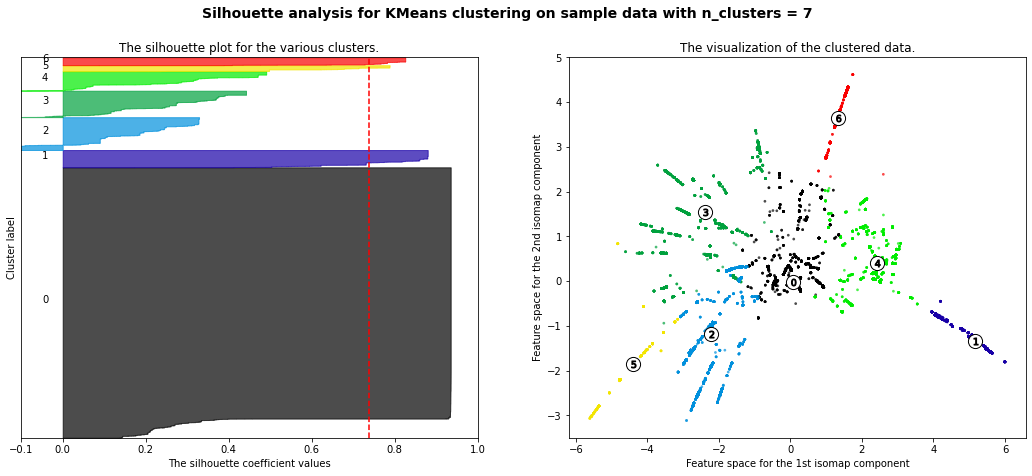

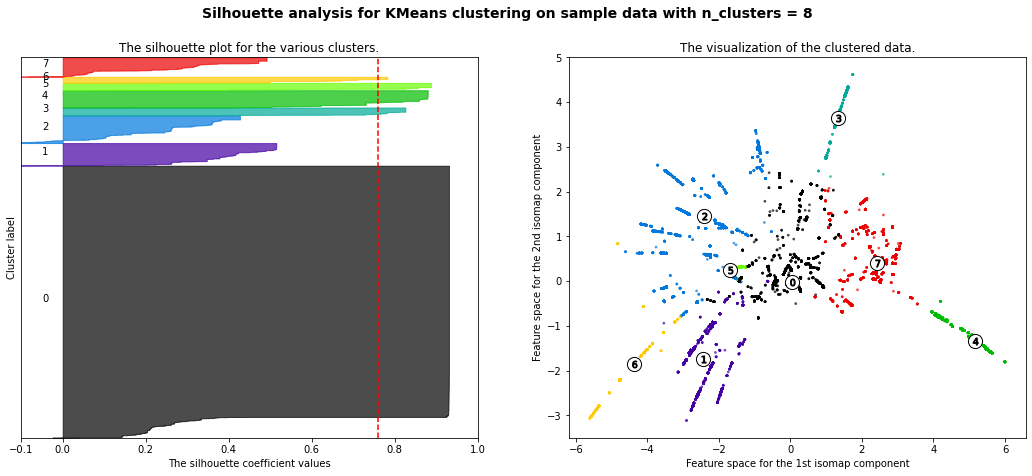

In [241]:
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np



X=reduced_data
y_pred= labels_isomap_reduced_data
range_n_clusters =  [6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

2) DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(reduced_data)

DBSCAN(eps=0.4, min_samples=20)

In [29]:
y_pred = db.fit_predict(reduced_data)

In [30]:
silhouette_isomap =  {}
for k in range(6, 8):
  
    if k == 3: labels = y_pred
    clusters = db.labels_
    
    silhouette_isomap[k] = silhouette_score(X_isomap_embed,clusters)

In [31]:
silhouette_isomap

{6: 0.9119343682188159, 7: 0.9119343682188159}

For n_clusters = 6 The average silhouette_score is : 0.9197766093389261


AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

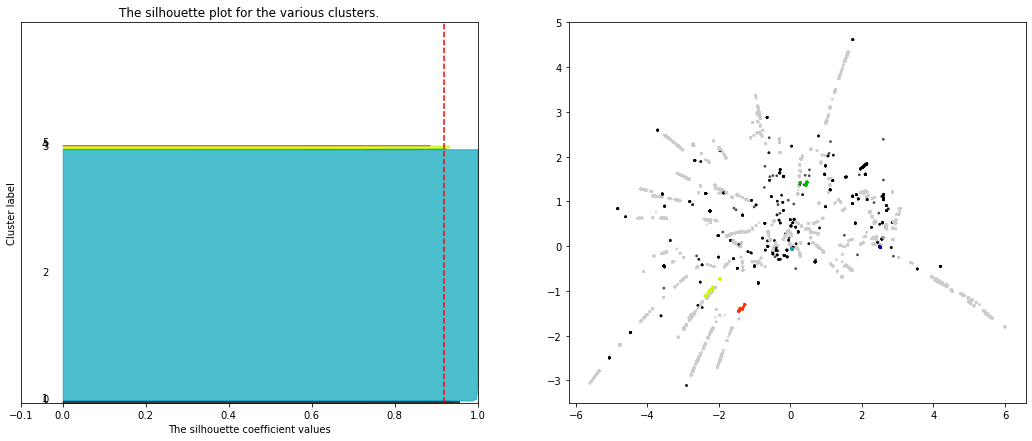

In [32]:
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np



X=reduced_data
y_pred= y_pred
range_n_clusters =  [6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = DBSCAN(eps=0.4, min_samples=20)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data.iloc[:,0], reduced_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<AxesSubplot:>

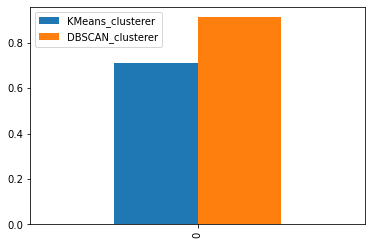

In [50]:
d = {'KMeans_clusterer': [0.7090281118269014], 'DBSCAN_clusterer': [0.9119343682188159]}
df = pd.DataFrame(data=d)
df.plot(kind='bar')

III) Analyse métier

    1) Préparation des données pour le diagramme en radar
    
Nous allons maintenant réaliser le diagramme en radar ou kiviat chart.
En comparant visuellemnt les differents clusters, nous pouvons voir à quels catégories appartiennet les clients qui se situent dans le même cluster.

In [258]:
# Nous avons besoin des noms de colonnes afin créer une nouvelle dataframe contennat le label de son cluster d'appartenance pour chaque individu
cols=list(X_train.columns)

In [259]:
cols

['review_score',
 'product_category_fashion',
 'product_category_groceries',
 'product_category_home_$_electonics',
 'product_category_leisure',
 'payment_type_boleto',
 'payment_type_credit_card',
 'Region_Central_West_region',
 'Region_Northeast_region',
 'Region_South_region',
 'Region_Southesar_region',
 'delivery_season_autumn',
 'delivery_season_spring',
 'delivery_season_summer',
 'delivery_season_winter',
 'purchace_date',
 'group']

In [267]:
# Copying the data 
processed_data_with_cluster_label=X_train

In [268]:
#Nous définissons ici une nouvelle colonne 'groupe' contenant les numéros de clusters
processed_data_with_cluster_label['group'] = labels_isomap_reduced_data

In [269]:
processed_data_with_cluster_label.shape

(88568, 16)

In [270]:
processed_data_with_cluster_label.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter,group
0,0.607412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.331878,0.891865,0
1,0.607412,0.448469,0.387652,0.752547,0.425257,0.90538,0.115639,0.472895,0.954508,0.431327,0.153031,0.425103,0.351154,0.331878,0.891865,0
2,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0
3,0.107412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865,0
4,0.607412,0.448469,0.387652,0.252547,0.925257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0


In [271]:
# Ajouter la colonne 'group'à la dataframe
cols.extend(['group'])

In [272]:
# Regrouper les clients en fonction de leur cluster d'appartenance
grouped_by_cluster = processed_data_with_cluster_label.groupby(['group']).mean()


In [273]:
grouped_by_cluster.to_csv('grouped_by_cluster.csv')

In [274]:
grouped_by_cluster

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
group,,,,,,,,,,,,,,,
0,0.499306,0.485485,0.495234,0.521051,0.499887,0.496666,0.507105,0.483973,0.505712,0.497578,0.518154,0.506105,0.513823,0.494821,0.485251
1,0.515522,0.530954,0.608499,0.432788,0.425257,0.405380,0.564621,0.523450,0.489677,0.431327,0.549722,0.425103,0.351154,0.331878,0.891865
2,0.433764,0.448469,0.607069,0.432490,0.425257,0.405380,0.418982,0.472895,0.454508,0.431327,0.563415,0.425103,0.351154,0.831878,0.391865
3,0.509561,0.664084,0.453554,0.376675,0.512092,0.420343,0.591450,0.674399,0.491800,0.474589,0.317707,0.574739,0.605147,0.428249,0.391865
4,0.505614,0.448469,0.387652,0.252547,0.925257,0.405380,0.588516,0.504128,0.454508,0.431327,0.607003,0.425103,0.351154,0.331878,0.891865
5,0.493874,0.485468,0.540283,0.536990,0.425257,0.793533,0.218497,0.481033,0.475609,0.655778,0.395271,0.430213,0.400833,0.777090,0.391865


In [275]:
# The shape is 8 rows by 15 columns because we calculated the mean values for every column and every group to make it possible to visualize theme on kiviat chart
grouped_by_cluster.shape

(6, 15)

In [276]:
grouped_by_cluster=grouped_by_cluster.reset_index()

III) Analyse métier

    2) Kiviat chart

In [277]:
# Libraries
# import matplotlib.pyplot as plt
# import pandas as pd
from math import pi
 
# Set data
df = grouped_by_cluster
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(grouped_by_cluster)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=20)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.5,1], ["0","50","100"], color="grey", size=20)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=25, color=color, y=1.1)

    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    

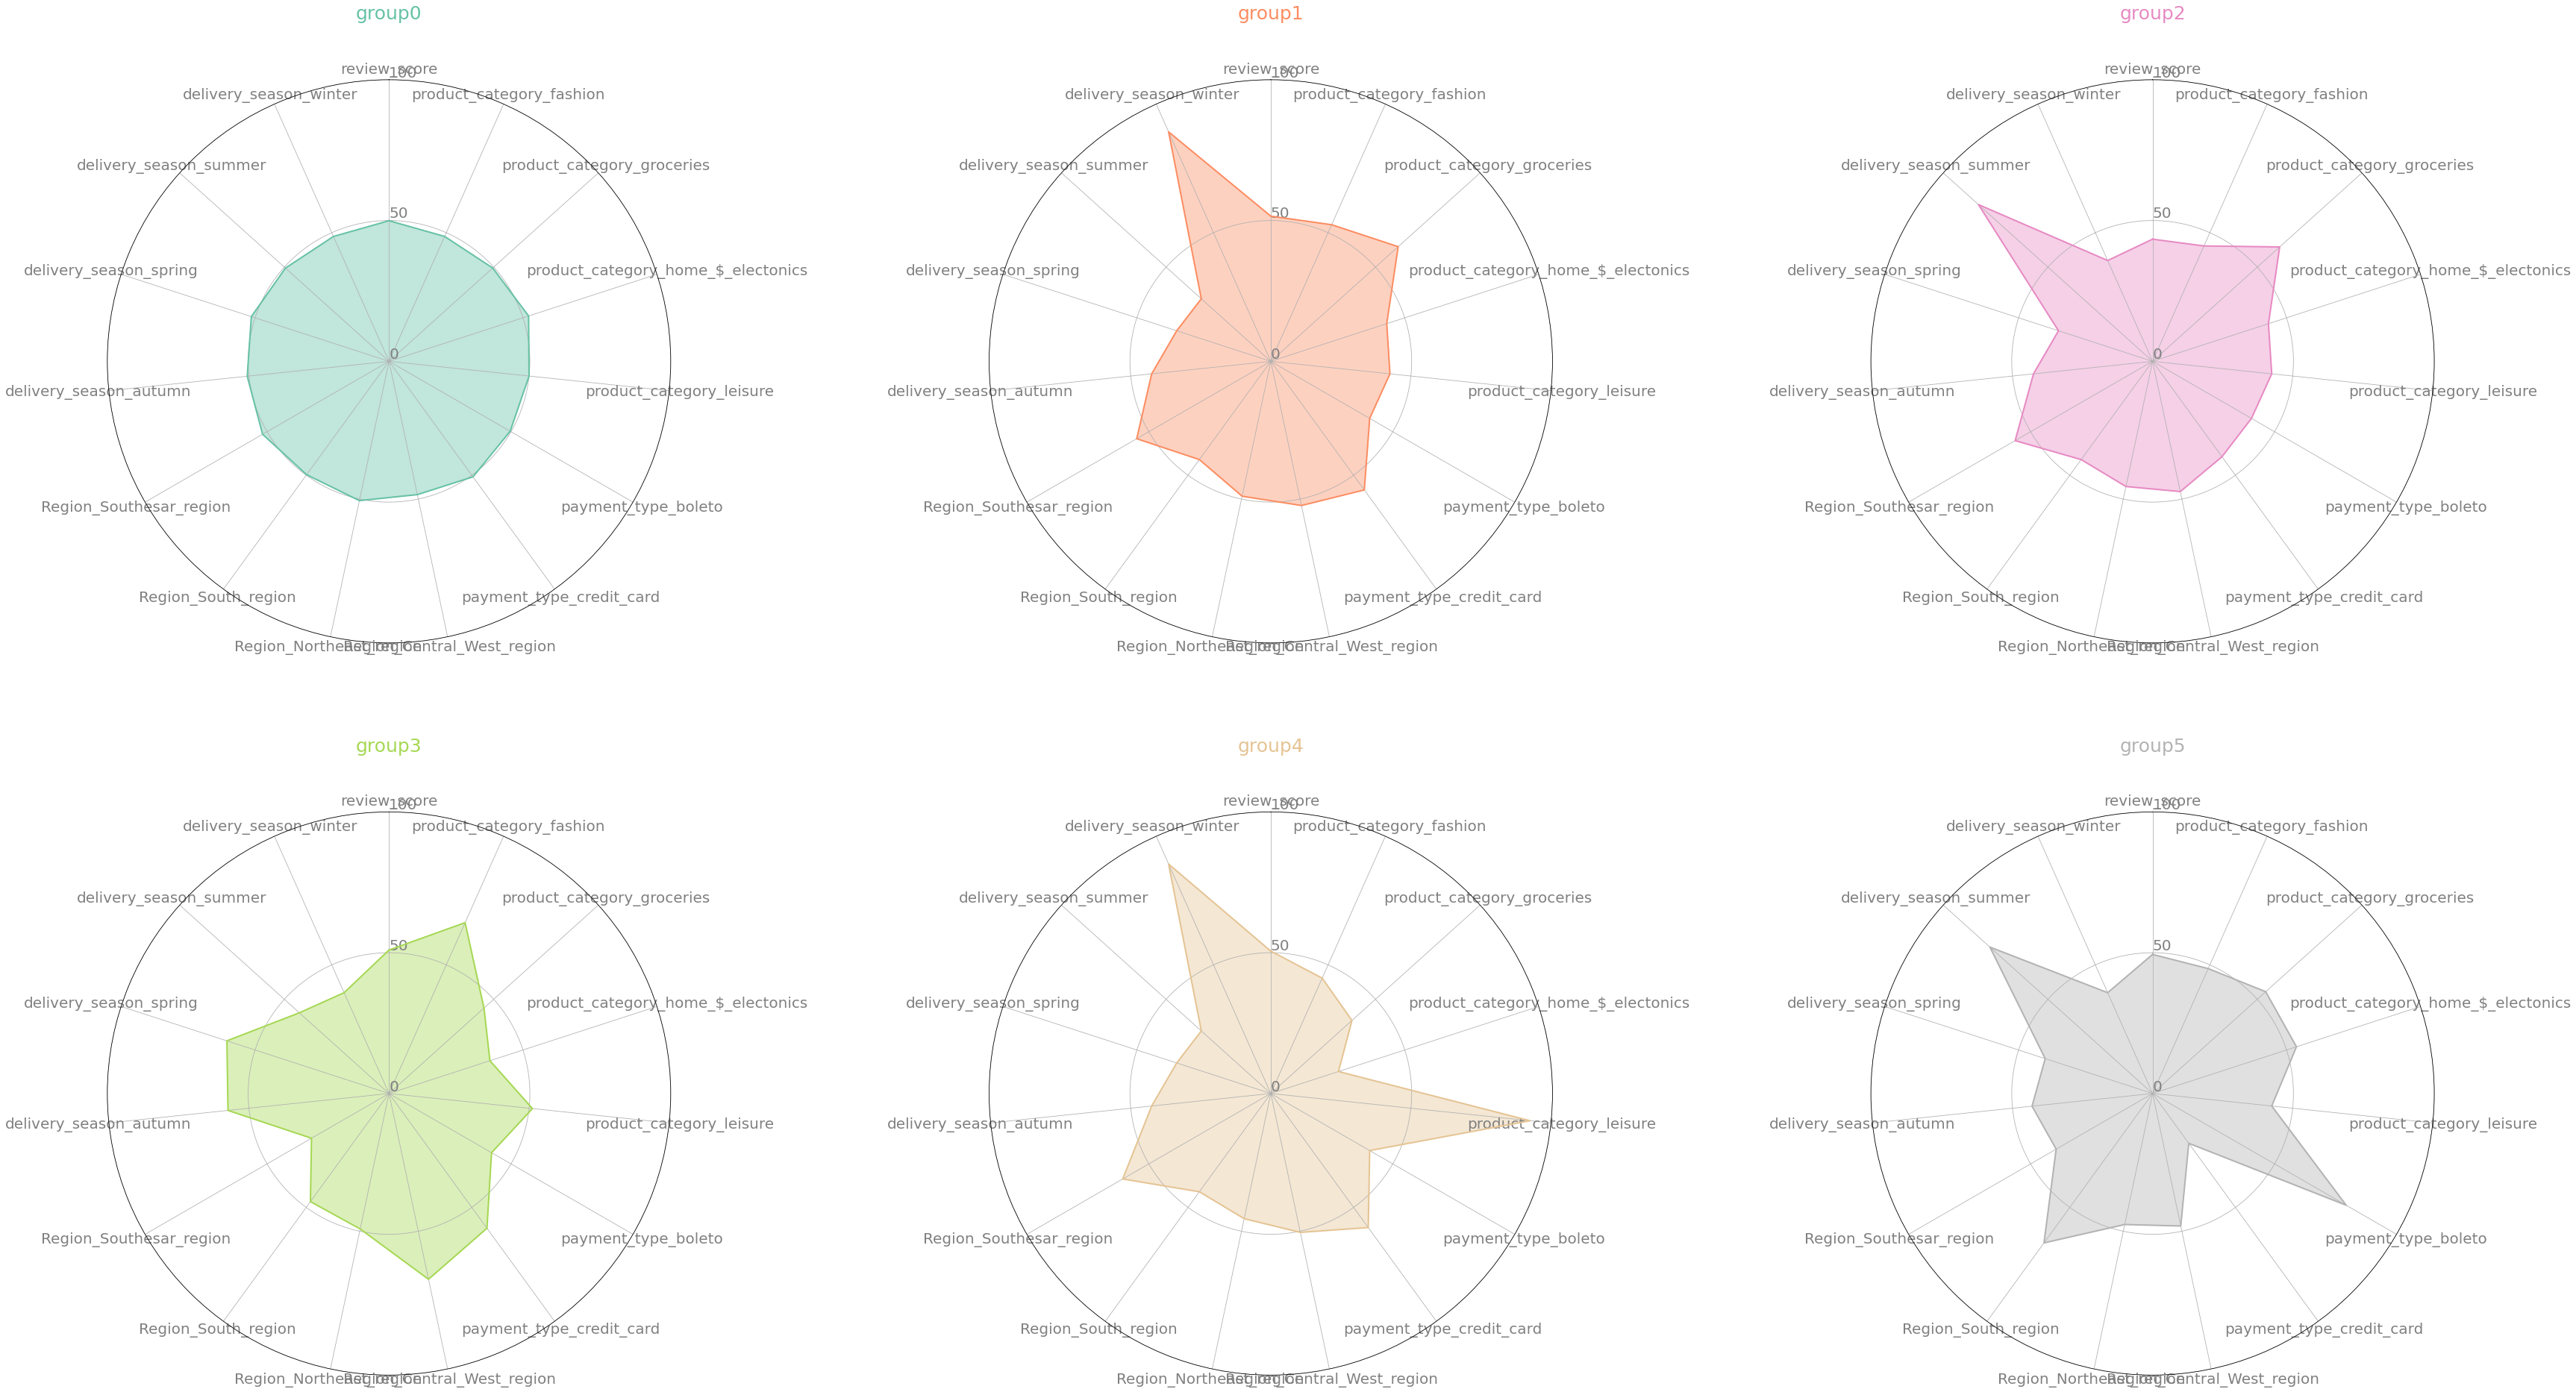

In [278]:
plt.figure(figsize=(60, 50))
plt.subplots_adjust(hspace=.3)
my_palette = plt.cm.get_cmap("Set2", len(df.index))
for row in range(0, len(df.index)):
    make_spider( row=row, title='group'+str(df['group'][row]), color=my_palette(row))

Analyse du diagramme en radar: 

    Groupe 0: ne se distingue pas par une description donnée
    Groupe 1: delivery_season_winter
    Groupe 2: delivery_season_summer
    Groupe 3: product_category_fashion, delivery_season_spring and automn, central west region  
    Groupe 4: product_category_leisure, delivery season winter, region south east region
    Groupe 5: product category leisure , Region_southeast_region, payment_type_boleto
    

Plusieurs groupes ont des features caracteristiques similaires


La stabilité d'un modèle de machine learning est la mesure du  changement des résultats de performance du modèle lorsque les training data changent.
Un modèle est considéré stable si les résultats qu'il génère sont assez stables ( selon un certain seuil défini) lorsque le training data est modifié.

Dans notre cas, nous voulons mesurer cette stabilité au cours du temps, car les données sont générées par les achats effectuées par les clients eu cours du temps.



- Créer un modèle de réference sur une partie de données (sur les achats des 12 premier mois) 
- Augmenter le jeux de données en ajoutant les données clients du mois suivant
- Entrainer un modèle pour chaqu'un des jeu de données
- Evaluer le modèle en mesurant les scores ARI
- Réaliser un graphique qui montre l'évolution des scores en fonction du temps

Proposer un contrat de maintenace pour le modèle en fonction des résultats



## Préparer les données

## Contrat de maintenance du modèle

In [187]:
X_train.shape

(88568, 15)

In [188]:
X_train.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
0,0.607412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.331878,0.891865
1,0.607412,0.448469,0.387652,0.752547,0.425257,0.90538,0.115639,0.472895,0.954508,0.431327,0.153031,0.425103,0.351154,0.331878,0.891865
2,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865
3,0.107412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
4,0.607412,0.448469,0.387652,0.252547,0.925257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865


In [189]:
# Pour récuperer la colonne 'purchace_date'
originally_merged_data =pd.read_csv('./data.csv')

In [190]:
originally_merged_data.shape

(126527, 20)

In [191]:
originally_merged_data.columns

Index(['customer_unique_id', 'state', 'city', 'Region', 'zip_code', 'latitude',
       'longitude', 'year_order', 'month_order', 'review_score',
       'payment_type', 'payment_value', 'purchace_date', 'Comment_Len',
       'delivery_season', 'product_category', 'product_photos_qty',
       'payment_sequential', 'delivery_delay_days', 'payment_installments'],
      dtype='object')

In [279]:
# This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object
purchase_date_col  = pd.to_datetime(originally_merged_data['purchace_date'])

In [280]:
# ajouter la colonne temps sur la dataset processed_data 
X_train['purchace_date'] = purchase_date_col

In [281]:
X_train.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter,group,purchace_date
0,0.607412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.331878,0.891865,0,2018-05-01
1,0.607412,0.448469,0.387652,0.752547,0.425257,0.90538,0.115639,0.472895,0.954508,0.431327,0.153031,0.425103,0.351154,0.331878,0.891865,0,2018-05-01
2,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0,2017-03-01
3,0.107412,0.448469,0.387652,0.252547,0.925257,0.90538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865,0,2017-10-01
4,0.607412,0.448469,0.387652,0.252547,0.925257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0,2017-11-01


In [282]:
# Définir les intervals de périodes sur lequels la fonction va itérer 

import datetime 
from dateutil.rrule import rrule, MONTHLY

# Afficher la date de premier achat et dernier achat 
strt_dt = X_train.purchace_date.min()
end_dt = X_train.purchace_date.max()
duration = end_dt - strt_dt

dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)] # afficher la liste contenant toutes les dates avec un pas d'un mois 

In [283]:
dates

[datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 10, 1, 0, 0),
 datetime.datetime(2016, 11, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 2, 1, 0, 0),
 datetime.datetime(2017, 3, 1, 0, 0),
 datetime.datetime(2017, 4, 1, 0, 0),
 datetime.datetime(2017, 5, 1, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2017, 8, 1, 0, 0),
 datetime.datetime(2017, 9, 1, 0, 0),
 datetime.datetime(2017, 10, 1, 0, 0),
 datetime.datetime(2017, 11, 1, 0, 0),
 datetime.datetime(2017, 12, 1, 0, 0),
 datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 2, 1, 0, 0),
 datetime.datetime(2018, 3, 1, 0, 0),
 datetime.datetime(2018, 4, 1, 0, 0),
 datetime.datetime(2018, 5, 1, 0, 0),
 datetime.datetime(2018, 6, 1, 0, 0),
 datetime.datetime(2018, 7, 1, 0, 0),
 datetime.datetime(2018, 8, 1, 0, 0)]

In [284]:
## Filtres qui vont permettre de sélectinner les datasets selon les 'purchase_date'

#filter1 = the_data.purchace_date > '2017, 8, 1' # periode pour les premiers 12 mois
#filter2 = the_data.purchace_date > '2017, 9, 1' # 13 mois
#filter3 = the_data.purchace_date >  '2017, 10, 1' # 14 mois ... etc...
#filter4 = the_data.purchace_date >  '2017, 11, 1'
#filter5 = the_data.purchace_date >  '2017, 12, 1'
#filter6 = the_data.purchace_date >  '2018, 1, 1'
#filter7 = the_data.purchace_date >  '2018, 2, 1'
#filter8 = the_data.purchace_date >  '2018, 3, 1'
#filter9 = the_data.purchace_date >  '2018, 4, 1'
#filter10 = the_data.purchace_date >  '2018, 5, 1'
#filter11 = the_data.purchace_date >  '2018, 6, 1'
#filter12 = the_data.purchace_date >  '2018, 7, 1'
#filter13 = the_data.purchace_date >  '2018, 8, 1'#


In [285]:
#from sklearn.metrics.cluster import adjusted_rand_score
#m_r = KMModel.fit(the_data_befor_resetting_index[filters[0]].set_index(['customer_unique_id', 'purchace_date']))
#d = the_data_befor_resetting_index[filters[10]].set_index(['customer_unique_id', 'purchace_date'])
#m_d = KMModel.fit(d)
#pred_m_ref = m_r.predict(d)
#pred_m_1 = m_d.predict(d)
#print(len(pred_m_ref), len(pred_m_1))
#adjusted_rand_score(pred_m_ref, pred_m_1)

## Filtrer le jeu des données en fonction des dates d'achat ' purchase_date'

In [286]:
# Cette fonction génère une liste de filtres à appliquer au jeu de données pour récuperer les données avec un pas d'un mois
def myFilterGenerator(listOfDates, data):
    my_Filters = []
    dates_after_one_year= listOfDates[12:]
    for i in dates_after_one_year:
        filt = data.purchace_date < i.strftime("%Y, %m, %d")
        my_Filters.append(filt)
    return my_Filters
    

In [287]:
filters = myFilterGenerator(dates, X_train)

In [288]:
# La dernière tranche du jeu de donnée ne comporte que 2 clients , nous allons donc aller jusqu'à la 11em tranche 
fts=filters[:10]

In [289]:
len(fts)

10

In [290]:
len(filters)

12

In [291]:
# Jeu de données de la première années d'achats
first_year_Data = X_train[filters[0]].set_index(['purchace_date'])

In [292]:
first_year_Data.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter,group
purchace_date,,,,,,,,,,,,,,,,
2017-03-01,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0
2017-03-01,0.607412,0.448469,0.887652,0.252547,0.425257,0.90538,0.115639,0.472895,0.454508,0.431327,0.153031,0.425103,0.351154,0.831878,0.391865,5
2017-07-01,0.357412,0.948469,0.387652,0.252547,0.425257,0.90538,0.115639,0.472895,0.454508,0.931327,0.153031,0.425103,0.351154,0.831878,0.391865,5
2017-08-01,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0
2017-08-01,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.115639,0.472895,0.454508,0.431327,0.653031,0.425103,0.351154,0.831878,0.391865,0


In [293]:
first_year_Data.shape

(21025, 16)

## 1) Entrainement d'un premier modèle m_ref sur les données de la première année
   2) Prediction pour les données de chaque période avec le modèle m_ref
    3) Entrainement d


In [295]:

from sklearn.metrics.cluster import adjusted_rand_score
def calculateScores(filters, first_year_Data, X_train): 
    scores = []
    KMModel = KMeans(n_clusters=4, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001,  
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     algorithm='auto')
    m_ref= KMModel.fit(first_year_Data)
    
    
    
    for f in filters:
        KMenas_Model = KMeans(n_clusters=4, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001,  
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     algorithm='auto')
        
        data = X_train[f].set_index(['purchace_date'])
       
        m_1 = KMenas_Model.fit(data) # Entraîner le model sur la portion des données de la période suivante (1ère année + f)
        pred_m_ref = m_ref.predict(data) # Prédictions avec le modèle de référence enraîné sur les données de la 1ère année
        pred_m_1 = m_1.predict(data) # Prédictions faites avec le modèle entraîné sur les données de la période suivante (1ère année + f)
        score = adjusted_rand_score(pred_m_ref, pred_m_1) # Calcule de score pour comparer le ARI entre les prédictions faites par le modèle de réfernec et le modèle m_1
        scores.append(score)
    return scores

In [230]:
#X_train = X_train.set_index(['group'])

In [296]:
scores = calculateScores(fts, first_year_Data, X_train)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


In [297]:
scores

[1.0,
 0.9858263113409934,
 0.3502298606845767,
 1.0,
 0.9862595915474462,
 0.34159692865619146,
 0.9861822265273615,
 0.9861741838737352,
 1.0,
 -1.3813397839402557]

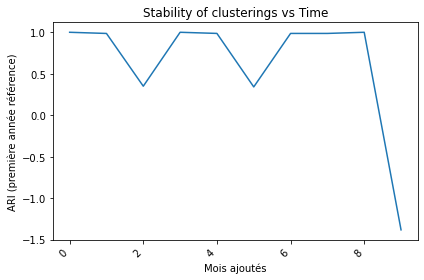

In [298]:
# Visualiser la stabilité temporelle des clusters

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(scores, label='k-means')
plt.title("Stability of clusterings vs Time")
plt.xticks(rotation='45', horizontalalignment="right")
ax.set_xlabel('Mois ajoutés')
ax.set_ylabel('ARI (première année référence)')
plt.tight_layout()
